## Install Necessary Libraries

In [1]:
!pip install yfinance

In [2]:
!pip install PyPortfolioOpt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.8 MB/s eta 0:00:00


In [141]:
#Import Libraries

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pypfopt
from pypfopt import risk_models
from pypfopt import plotting
from pypfopt import expected_returns
from pypfopt import EfficientFrontier
from pypfopt import objective_functions
from pypfopt import EfficientSemivariance

In [4]:
tickers= ['PYPL', 'ULTA', 'SBUX', 'ADBE', 'NKE', 'AXP', 'KO', 'COST', 'SIRI', 'INTC', 'DIS', 'CRM']

In [5]:
ohlc= yf.download(tickers, period='5y')

[*********************100%%**********************]  12 of 12 completed


In [7]:
ohlc

Price        Adj Close                                                  \
Ticker            ADBE         AXP        COST         CRM         DIS   
Date                                                                     
2019-08-19  287.970001  115.994034  252.522049  143.259583  133.431808   
2019-08-20  285.709991  113.215385  250.103287  145.124222  133.274017   
2019-08-21  291.529999  114.222412  252.586227  146.958984  133.895340   
2019-08-22  287.690002  114.007927  256.471039  147.816528  134.210953   
2019-08-23  282.440002  109.802696  251.056137  151.137009  129.861526   
...                ...         ...         ...         ...         ...   
2024-08-12  530.929993  237.050003  863.570007  251.309998   85.949997   
2024-08-13  535.219971  238.990005  864.820007  254.600006   85.599998   
2024-08-14  539.789978  243.759995  862.710022  255.320007   86.300003   
2024-08-15  554.159973  249.500000  877.349976  262.790009   88.790001   
2024-08-16  553.460022  251.710007  870.590027  262.910004   89.300003   

Price                                                               ...  \
Ticker           INTC         KO        NKE        PYPL       SBUX  ...   
Date                                                                ...   
2019-08-19  41.433163  46.821964  76.929855  107.669998  87.496124  ...   
2019-08-20  40.880493  46.128498  76.360924  107.370003  86.563766  ...   
2019-08-21  41.362988  46.316841  78.456512  109.820000  87.188347  ...   
2019-08-22  41.038399  46.650734  78.997009  108.769997  87.342239  ...   
2019-08-23  39.441788  46.008633  76.275597  106.040001  85.721931  ...   
...               ...        ...        ...         ...        ...  ...   
2024-08-12  19.360001  68.169998  74.639999   63.459999  77.029999  ...   
2024-08-13  20.469999  68.459999  78.500000   65.110001  95.900002  ...   
2024-08-14  19.920000  68.580002  78.519997   66.139999  93.900002  ...   
2024-08-15  20.690001  68.650002  82.500000   67.940002  94.879997  ...   
2024-08-16  20.870001  69.180000  83.230003   67.959999  94.809998  ...   

Price        Volume                                                    \
Ticker         COST       CRM       DIS      INTC        KO       NKE   
Date                                                                    
2019-08-19  1313400   4632100  11741800  21403600  10936200   7027900   
2019-08-20  1390600   6259200   8628000  23113300   8176700   5903100   
2019-08-21  1682300   6142400   6325000  15915000  10886500   6454200   
2019-08-22  2345500  11744500   6967100  19783000   7467900   5571600   
2019-08-23  1984300  26531900  10190900  32814000  14160400   8497800   
...             ...       ...       ...       ...       ...       ...   
2024-08-12  1748200   3679700  11754600  54677600  11012300   7067300   
2024-08-13  1484100   4031600  14615200  77511300   9877600  22114800   
2024-08-14  1341500   4145200   9475100  56758200  14328000  13613000   
2024-08-15  1923800   5167900  12401000  84814900  11285100  23583600   
2024-08-16  1451414   2589747   8292369  48178611   9218974  12341668   

Price                                               
Ticker          PYPL       SBUX      SIRI     ULTA  
Date                                                
2019-08-19   5718300    5324900  19804000   807100  
2019-08-20   4358600    6809100  16479200   475800  
2019-08-21   5415900    4740500   9689300   521100  
2019-08-22   3863600    5146200  11138800   753000  
2019-08-23   7456400    8076600  20287900  1098500  
...              ...        ...       ...      ...  
2024-08-12   7519500   13123000  10845100   843600  
2024-08-13   8638600  157215500   9985000  1059400  
2024-08-14   8944800   45737800   9054800   970800  
2024-08-15  12968300   21109800  33792400  4424900  
2024-08-16   9360086   16329508  15910349  2935051  

[1258 rows x 72 columns]

In [8]:
prices= ohlc['Adj Close'].dropna(how='all')

In [9]:
prices.tail()

Ticker,ADBE,AXP,COST,CRM,DIS,INTC,KO,NKE,PYPL,SBUX,SIRI,ULTA
Date,,,,,,,,,,,,
2024-08-12,530.929993,237.050003,863.570007,251.309998,85.949997,19.360001,68.169998,74.639999,63.459999,77.029999,2.980,320.549988
2024-08-13,535.219971,238.990005,864.820007,254.600006,85.599998,20.469999,68.459999,78.500000,65.110001,95.900002,3.000,331.559998
2024-08-14,539.789978,243.759995,862.710022,255.320007,86.300003,19.920000,68.580002,78.519997,66.139999,93.900002,2.910,329.049988
2024-08-15,554.159973,249.500000,877.349976,262.790009,88.790001,20.690001,68.650002,82.500000,67.940002,94.879997,3.020,365.799988
2024-08-16,553.460022,251.710007,870.590027,262.910004,89.300003,20.870001,69.180000,83.230003,67.959999,94.809998,2.995,377.230011


In [10]:
prices.head()

Ticker,ADBE,AXP,COST,CRM,DIS,INTC,KO,NKE,PYPL,SBUX,SIRI,ULTA
Date,,,,,,,,,,,,
2019-08-19,287.970001,115.994034,252.522049,143.259583,133.431808,41.433163,46.821964,76.929855,107.669998,87.496124,5.497697,325.250000
2019-08-20,285.709991,113.215385,250.103287,145.124222,133.274017,40.880493,46.128498,76.360924,107.370003,86.563766,5.417633,323.079987
2019-08-21,291.529999,114.222412,252.586227,146.958984,133.895340,41.362988,46.316841,78.456512,109.820000,87.188347,5.479905,328.119995
2019-08-22,287.690002,114.007927,256.471039,147.816528,134.210953,41.038399,46.650734,78.997009,108.769997,87.342239,5.479905,334.859985
2019-08-23,282.440002,109.802696,251.056137,151.137009,129.861526,39.441788,46.008633,76.275597,106.040001,85.721931,5.328674,322.100006


<Axes: xlabel='Date'>

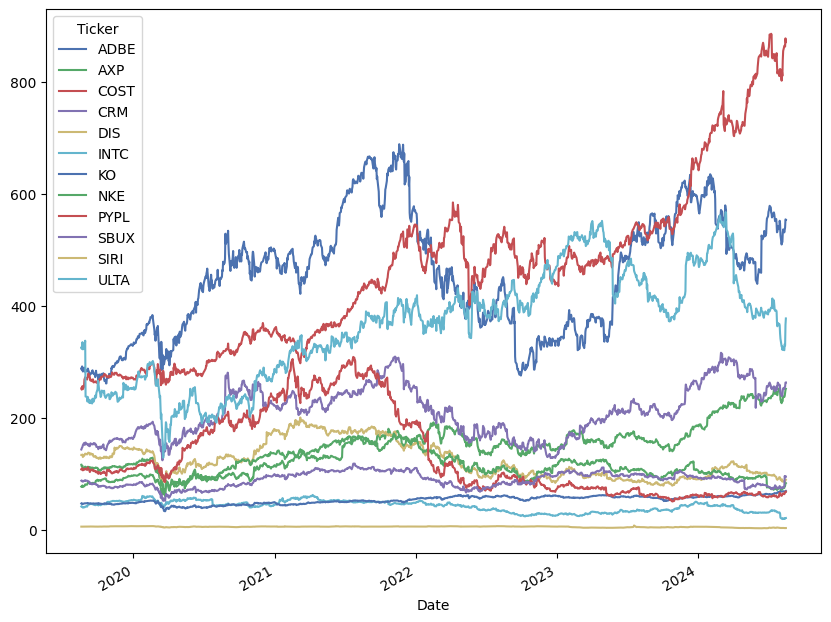

In [11]:
prices.plot(figsize=(10,8))

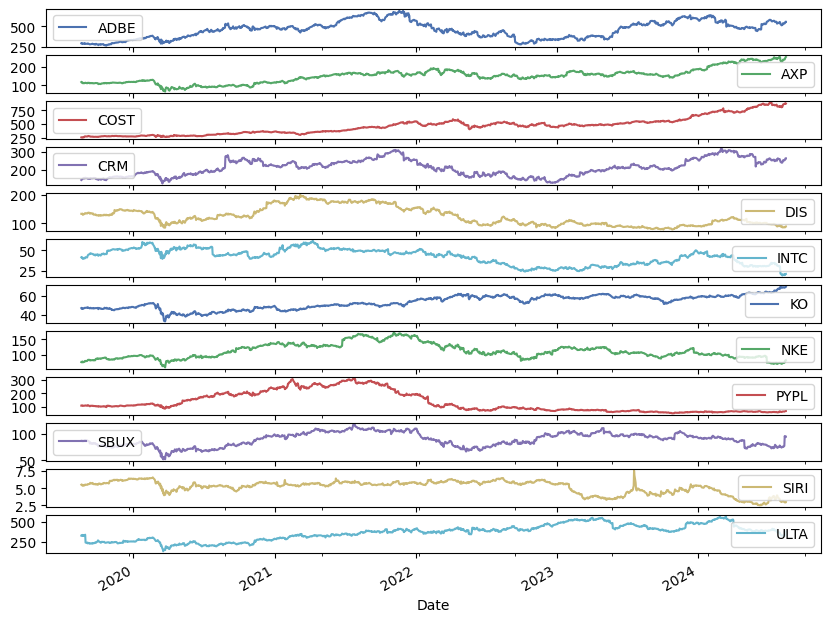

In [12]:
prices.plot(figsize=(10,8), subplots=True)
plt.show()

## Covariance Method

In [13]:
sample_cov= risk_models.sample_cov(prices, frequency=252)
sample_cov

Ticker,ADBE,AXP,COST,CRM,DIS,INTC,KO,NKE,PYPL,SBUX,SIRI,ULTA
Ticker,,,,,,,,,,,,
ADBE,0.144684,0.053936,0.047830,0.101393,0.051824,0.078804,0.026469,0.055876,0.096595,0.057000,0.042892,0.049233
AXP,0.053936,0.146158,0.029169,0.057978,0.081200,0.067369,0.042564,0.064149,0.071872,0.070650,0.058407,0.093315
COST,0.047830,0.029169,0.057938,0.040486,0.024667,0.042098,0.022444,0.033109,0.040690,0.031009,0.027812,0.030623
CRM,0.101393,0.057978,0.040486,0.155799,0.054466,0.068425,0.025396,0.054001,0.095772,0.054199,0.043390,0.055369
DIS,0.051824,0.081200,0.024667,0.054466,0.115409,0.057103,0.031490,0.056983,0.066865,0.059345,0.039474,0.068258
INTC,0.078804,0.067369,0.042098,0.068425,0.057103,0.175614,0.028281,0.052347,0.078712,0.053721,0.049601,0.060343
KO,0.026469,0.042564,0.022444,0.025396,0.031490,0.028281,0.043077,0.030674,0.024980,0.032717,0.027907,0.035702
NKE,0.055876,0.064149,0.033109,0.054001,0.056983,0.052347,0.030674,0.119105,0.068202,0.065418,0.038010,0.068625
PYPL,0.096595,0.071872,0.040690,0.095772,0.066865,0.078712,0.024980,0.068202,0.199530,0.072875,0.053005,0.063279


Covaraiance matrix helps to analyze how two assets move together. Positive means they tend to move in same direction and negative covariance means they move opposite direction.


>> ADBE is 0.14 and CRM is 0.101 meaning they tend to move together. If one performs well the another does it too.

<Axes: >

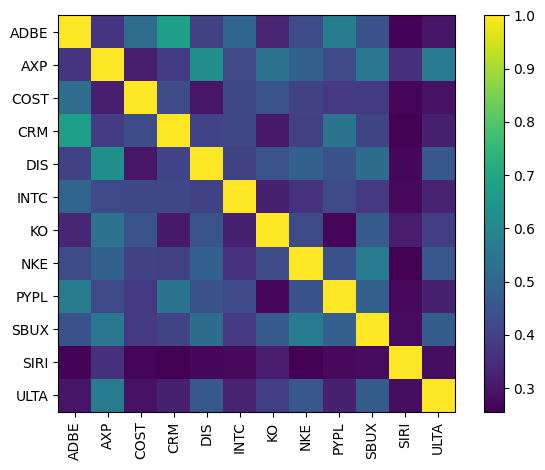

In [14]:
plotting.plot_covariance(sample_cov, plot_correlation=True)

<Axes: >

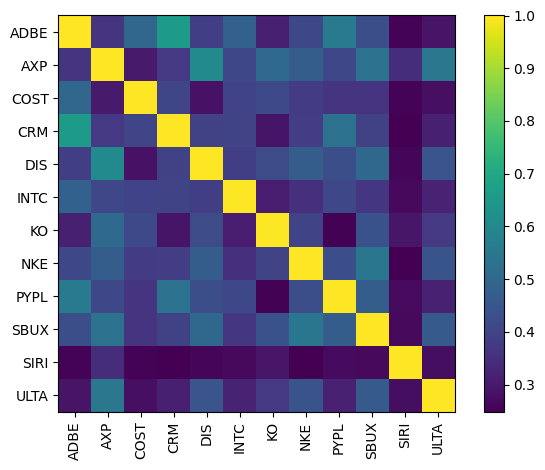

In [15]:
# Ledoit Wolf

S= risk_models.CovarianceShrinkage(prices).ledoit_wolf()
plotting.plot_covariance(S, plot_correlation= True)

In [16]:
mu= expected_returns.capm_return(prices)
mu

,mkt
Ticker,
ADBE,0.077671
AXP,0.079833
COST,0.050595
CRM,0.077681
DIS,0.070560
INTC,0.078092
KO,0.046578
NKE,0.070518
PYPL,0.086669


CAPM model is used to determine expected return from an investment based on its level of risk.

>> AXP is expected to give annual return of 8.03% while KO has least return of all which is about 4%.

## LONG SHORT PORTFOLIO

In [17]:
S= risk_models.CovarianceShrinkage(prices).ledoit_wolf()
ef= EfficientFrontier(None, S, weight_bounds= (None, None))
ef.min_volatility()
weights= ef.clean_weights()
weights

OrderedDict([('ADBE', -0.02767),
             ('AXP', -0.08117),
             ('COST', 0.32268),
             ('CRM', 0.03253),
             ('DIS', 0.09117),
             ('INTC', 0.00566),
             ('KO', 0.53834),
             ('NKE', 0.03129),
             ('PYPL', 0.00502),
             ('SBUX', 0.03031),
             ('SIRI', 0.05188),
             ('ULTA', 0.0)])

>> Negative means short the stock.

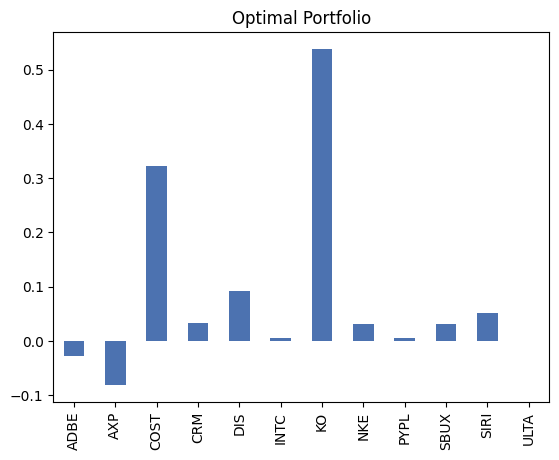

In [18]:
pd.Series(weights).plot(kind='bar', title= 'Optimal Portfolio')
plt.show()

>> From the figure above, we should short ADBE, AXP. Neutral position towards ULTA and long all the remaining stocks. The highest positive return 0.53 for KO suggest that it might provide higher return but also comes with higher risk.

In [19]:
ef.portfolio_performance(verbose='True')

Annual volatility: 18.6%


(None, 0.1864648782830879, None)

>> Volatility of 18.6% indicates that portfolio can experience considerable fluctuations in its return throughout the year.


## Maximizing return

#### Using CAPM model to estimate returns, Ledoit-Wolf to stabilize covariance matrix and finding portfolio weights to maximize risk-adjusted return.

In [21]:
mu= expected_returns.capm_return(prices)
S= risk_models.CovarianceShrinkage(prices).ledoit_wolf()
ef= EfficientFrontier(mu,S)
ef.max_sharpe()
weights= ef.clean_weights()
weights

OrderedDict([('ADBE', 0.08441),
             ('AXP', 0.08492),
             ('COST', 0.08102),
             ('CRM', 0.08382),
             ('DIS', 0.08326),
             ('INTC', 0.08408),
             ('KO', 0.07894),
             ('NKE', 0.08384),
             ('PYPL', 0.08409),
             ('SBUX', 0.08385),
             ('SIRI', 0.08364),
             ('ULTA', 0.08414)])

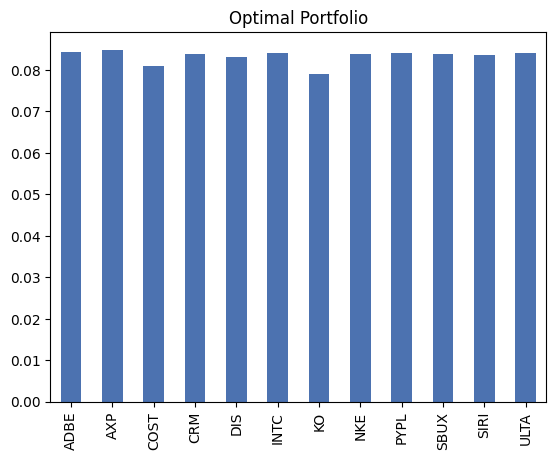

In [23]:
pd.Series(weights).plot(kind='bar', title= 'Optimal Portfolio')
plt.show()

>> Weights are fairly distributed reflecting a diversified approach.

In [24]:
## Minimize risk for a given return

ef= EfficientFrontier(mu, S, weight_bounds=(None, None))
ef.add_objective(objective_functions.L2_reg, gamma=0.1)
ef.efficient_return(target_return=0.05, market_neutral=True)
weights= ef.clean_weights()
weights

OrderedDict([('ADBE', 0.21415),
             ('AXP', 0.32375),
             ('COST', -0.67717),
             ('CRM', 0.16219),
             ('DIS', -0.0263),
             ('INTC', 0.20812),
             ('KO', -0.87557),
             ('NKE', 0.03086),
             ('PYPL', 0.35622),
             ('SBUX', 0.04557),
             ('SIRI', -0.01885),
             ('ULTA', 0.25704)])

It includes both long and short position aiming to achieve 5% return rate while minimizing risk and following market constraint.

>> ADBE has weight of 0.21, meaning its good to invest 21 percent in ADBE while KO has weight of -0.86 so its better to short this position significantly.

In [25]:
ef.portfolio_performance(verbose=True)

Expected annual return: 5.0%
Annual volatility: 37.6%
Sharpe Ratio: 0.08


(0.05000000000000002, 0.3763044633507001, 0.07972267916482634)

>> Portfolio is expectd to deliver 5% annual rate while the volaitily is 37.3 % which indicates it is riskier and have higher fluctuations. A sharpe ratio of 0.08 indicates that portfolio is not providing enough return for the risk taken.

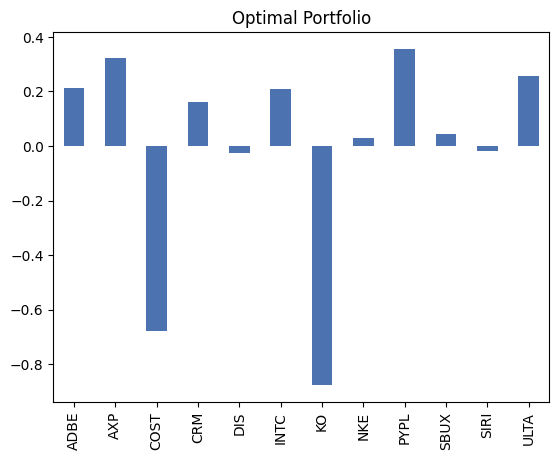

In [26]:
pd.Series(weights).plot(kind='bar', title= 'Optimal Portfolio')
plt.show()

>> Short COST and KO.

<Axes: >

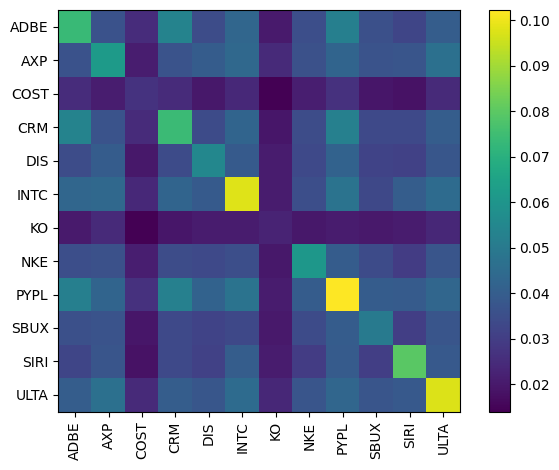

In [27]:
## Semi Covariance

semicov= risk_models.semicovariance(prices, benchmark= 0) # consider only return below zero
plotting.plot_covariance(semicov)


In [28]:
ef= EfficientFrontier(mu,semicov)
ef.efficient_return(0.05)
weights= ef.clean_weights()
weights

OrderedDict([('ADBE', 0.0),
             ('AXP', 0.0),
             ('COST', 0.39605),
             ('CRM', 0.0),
             ('DIS', 0.0148),
             ('INTC', 0.0),
             ('KO', 0.52785),
             ('NKE', 0.00129),
             ('PYPL', 0.0),
             ('SBUX', 0.04844),
             ('SIRI', 0.01157),
             ('ULTA', 0.0)])

In [29]:
ef.portfolio_performance(verbose='True')

Expected annual return: 5.0%
Annual volatility: 13.9%
Sharpe Ratio: 0.22


(0.05, 0.13905096931976965, 0.2157482263285074)

>> At 5% expected return rate, we have moderate volatility of 13.9% which indicates portfolio is more stable and less riskier. The sharpe ratio of 0.22 indicates portfolio offers modest risk adjusted return.

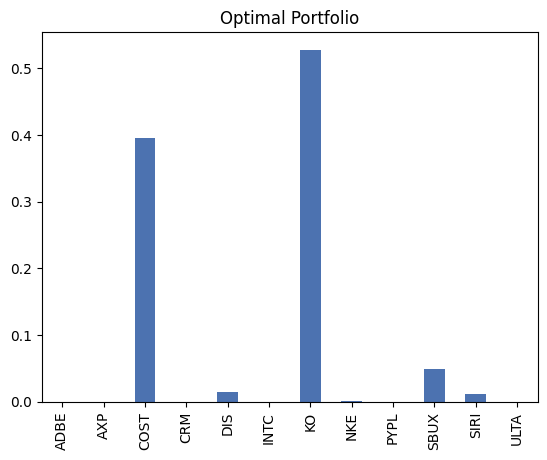

In [30]:
pd.Series(weights).plot(kind='bar', title= 'Optimal Portfolio')
plt.show()

>> LONG KO, COST, DIS, SBUX, SIRI

SEMIVARIANCE

It looks for potential losses and disregards returns.

In [31]:
returns= expected_returns.returns_from_prices(prices)
returns= returns.dropna()
returns

Ticker,ADBE,AXP,COST,CRM,DIS,INTC,KO,NKE,PYPL,SBUX,SIRI,ULTA
Date,,,,,,,,,,,,
2019-08-20,-0.007848,-0.023955,-0.009578,0.013016,-0.001183,-0.013339,-0.014811,-0.007395,-0.002786,-0.010656,-0.014563,-0.006672
2019-08-21,0.020370,0.008895,0.009928,0.012643,0.004662,0.011803,0.004083,0.027443,0.022818,0.007215,0.011494,0.015600
2019-08-22,-0.013172,-0.001878,0.015380,0.005835,0.002357,-0.007847,0.007209,0.006889,-0.009561,0.001765,0.000000,0.020541
2019-08-23,-0.018249,-0.036885,-0.021113,0.022464,-0.032407,-0.038905,-0.013764,-0.034450,-0.025099,-0.018551,-0.027597,-0.038105
2019-08-26,0.022306,0.006539,0.016240,0.023553,0.022329,0.013345,0.014887,0.022501,0.015277,0.019008,0.015025,0.025210
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-12,-0.010013,-0.003363,0.010106,-0.004831,-0.003016,-0.017757,-0.007426,0.004036,-0.019469,0.025836,-0.050955,-0.005028
2024-08-13,0.008080,0.008184,0.001447,0.013091,-0.004072,0.057335,0.004254,0.051715,0.026001,0.244970,0.006711,0.034347
2024-08-14,0.008539,0.019959,-0.002440,0.002828,0.008178,-0.026869,0.001753,0.000255,0.015819,-0.020855,-0.030000,-0.007570


In [32]:
ef= EfficientSemivariance(mu,returns)
ef.efficient_return(0.05)
weights= ef.clean_weights()
weights

OrderedDict([('ADBE', 0.0),
             ('AXP', 0.0),
             ('COST', 0.39856),
             ('CRM', 0.00183),
             ('DIS', 0.03112),
             ('INTC', 0.0),
             ('KO', 0.51822),
             ('NKE', 0.0),
             ('PYPL', 0.0),
             ('SBUX', 0.02032),
             ('SIRI', 0.02995),
             ('ULTA', 0.0)])

In [33]:
ef.portfolio_performance(verbose='True')

Expected annual return: 5.0%
Annual semi-deviation: 13.3%
Sortino Ratio: 0.23


(0.0501031828006125, 0.132674204749093, 0.22689552093070522)

>> The portfolio is expected to deliver 5% annual return with 13.3% average downward risk. The Sortino Ratio of 0.23 indicates that portfolio performance to downside risk is relatively low.

Handling 0 weights in the portfolio.
#### Adding Constraint

In [34]:
mu = expected_returns.capm_return(prices)
S= risk_models.CovarianceShrinkage(prices).ledoit_wolf()

ef= EfficientFrontier(mu,S)

adbe_index= ef.tickers.index('ADBE')
ef.add_constraint(lambda w: w[adbe_index]==0.1)

axp_index= ef.tickers.index('AXP')
ef.add_constraint(lambda w: w[axp_index]<=0.5)


crm_index= ef.tickers.index('CRM')
ef.add_constraint(lambda w: w[crm_index]>=0.01)

nke_index= ef.tickers.index('NKE')
ef.add_constraint(lambda w: w[nke_index]==0.01)


ulta_index= ef.tickers.index('ULTA')
ef.add_constraint(lambda w: w[ulta_index]<=0.02)

ef.max_sharpe()

weights= ef.clean_weights()



In [35]:
weights

OrderedDict([('ADBE', 0.1),
             ('AXP', 0.11507),
             ('COST', 0.09293),
             ('CRM', 0.08438),
             ('DIS', 0.10175),
             ('INTC', 0.08627),
             ('KO', 0.09682),
             ('NKE', 0.01),
             ('PYPL', 0.08739),
             ('SBUX', 0.11742),
             ('SIRI', 0.08797),
             ('ULTA', 0.02)])

In [36]:
ef.portfolio_performance(verbose=True)

Expected annual return: 7.1%
Annual volatility: 24.1%
Sharpe Ratio: 0.21


(0.07081033348826553, 0.24110585913520086, 0.2107386924171489)

The portfolio is anticipated to make 7.1% return. A 24.1% indicates that high level of overall risk. A sharpe ratio of 0.21 indicates that return earned per unit of overall risk is relatively low.

## Handling 0 weight with Gamma

In [39]:
mu = expected_returns.capm_return(prices)
S= risk_models.CovarianceShrinkage(prices).ledoit_wolf()

ef= EfficientFrontier(mu,S)
ef.add_objective(objective_functions.L2_reg, gamma= 0.05)
ef.efficient_return(0.05)

weight= ef.clean_weights()

In [40]:
weights

OrderedDict([('ADBE', 0.1),
             ('AXP', 0.11507),
             ('COST', 0.09293),
             ('CRM', 0.08438),
             ('DIS', 0.10175),
             ('INTC', 0.08627),
             ('KO', 0.09682),
             ('NKE', 0.01),
             ('PYPL', 0.08739),
             ('SBUX', 0.11742),
             ('SIRI', 0.08797),
             ('ULTA', 0.02)])

>> More diversified portfolio.

In [41]:
ef.portfolio_performance(verbose=True)

Expected annual return: 5.9%
Annual volatility: 19.7%
Sharpe Ratio: 0.20


(0.05873603914667708, 0.1967161935452635, 0.19691332192112637)

The portfolio is anticipated to make 5.9% return. A 19.7% indicates that high level of overall risk. A sharpe ratio of 0.20 indicates that return earned per unit of overall risk is relatively low.

<Axes: >

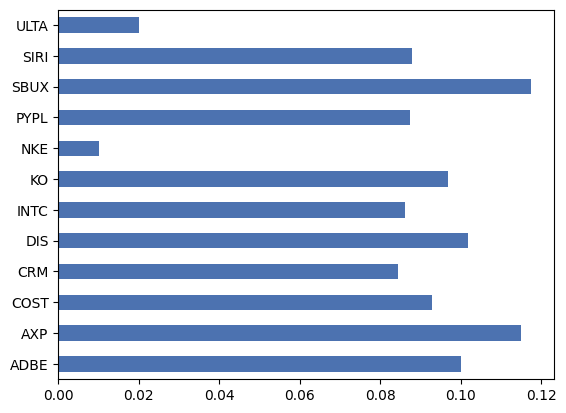

In [42]:
pd.Series(weights).plot(kind='barh')

SEMI VARIANCE WITH GAMMA

In [43]:
ef= EfficientSemivariance(mu,returns)
ef.add_objective(objective_functions.L2_reg, gamma=0.01)
ef.efficient_return(0.05)
weights= ef.clean_weights()
weights

OrderedDict([('ADBE', 0.08157),
             ('AXP', 0.08209),
             ('COST', 0.08817),
             ('CRM', 0.08194),
             ('DIS', 0.08342),
             ('INTC', 0.08132),
             ('KO', 0.08882),
             ('NKE', 0.08361),
             ('PYPL', 0.08021),
             ('SBUX', 0.08387),
             ('SIRI', 0.0839),
             ('ULTA', 0.08108)])

In [44]:
ef.portfolio_performance(verbose=True)

Expected annual return: 7.1%
Annual semi-deviation: 17.3%
Sortino Ratio: 0.30


(0.07103691044631623, 0.1727313270694846, 0.29546991453255966)

>> The portfolio is expected to deliver 7.1% annual return with 17.3% average downward risk. The Sortino Ratio of 0.30 indicates that portfolio performance to downside risk is relatively low.

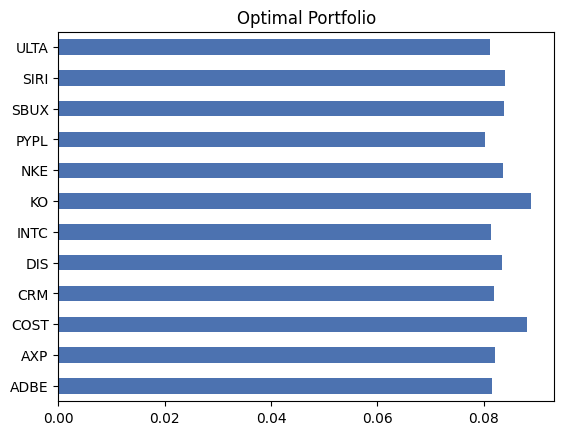

In [45]:
pd.Series(weights).plot(kind='barh', title='Optimal Portfolio')
plt.show()

## BLACK LITTERMAN ALLOCATION

In [46]:
market_prices= yf.download('SPY', period='5y')['Adj Close']
market_prices.head()

[*********************100%%**********************]  1 of 1 completed


,Adj Close
Date,
2019-08-19,270.190308
2019-08-20,268.119904
2019-08-21,270.301208
2019-08-22,270.217987
2019-08-23,263.276917


In [47]:
market_prices.tail()

,Adj Close
Date,
2024-08-12,533.270020
2024-08-13,542.039978
2024-08-14,543.750000
2024-08-15,553.070007
2024-08-16,554.309998


In [48]:
# Market Cap

mcaps={}
for t in tickers:
  stock= yf.Ticker(t)
  mcaps[t]= stock.info['marketCap']

mcaps

{'PYPL': 69477548032,
 'ULTA': 18000058368,
 'SBUX': 107438686208,
 'ADBE': 245404172288,
 'NKE': 124791734272,
 'AXP': 178943672320,
 'KO': 298156818432,
 'COST': 385963032576,
 'SIRI': 11531828224,
 'INTC': 89240125440,
 'DIS': 161953595392,
 'CRM': 254759796736}

In [50]:
from pypfopt import black_litterman, risk_models
from pypfopt import BlackLittermanModel, plotting

S= risk_models.CovarianceShrinkage(prices).ledoit_wolf()
delta= black_litterman.market_implied_risk_aversion(market_prices)
delta


3.3405501856531967

>> Delta of 3.34 indicates market implied risk aversion and it is moderate risk.It favors safer assets, but still allows for riskier investment to capture return.

<Axes: >

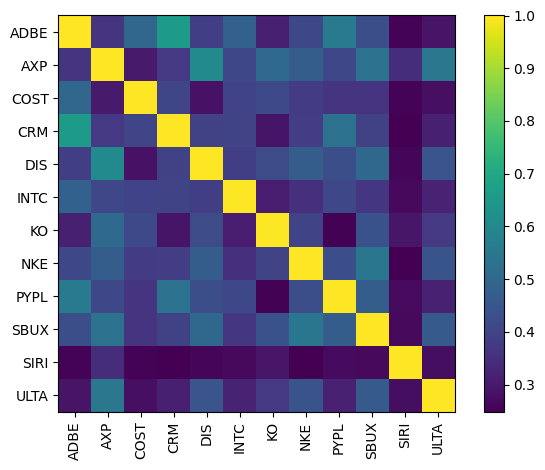

In [51]:
plotting.plot_covariance(S,plot_correlation=True)

In [52]:
market_prior= black_litterman.market_implied_prior_returns(mcaps, delta, S)
market_prior

,0
Ticker,
ADBE,0.244794
AXP,0.221453
COST,0.147962
CRM,0.244578
DIS,0.193724
INTC,0.216911
KO,0.121570
NKE,0.192537
PYPL,0.243537


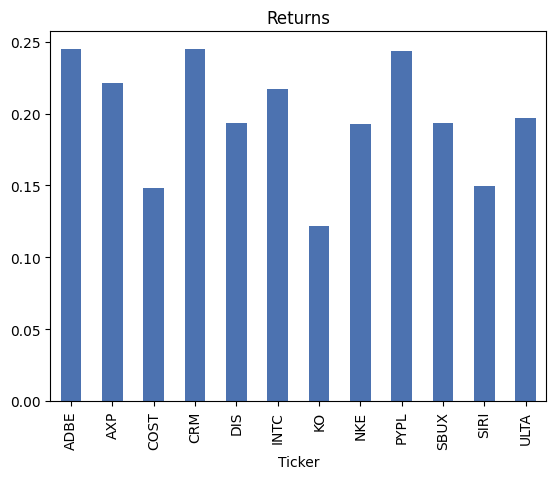

In [53]:
market_prior.plot(kind='bar', title= 'Returns')
plt.show()

From market point of view, ADBE, CRM & PYPL has expected about 24% return rates.

In [54]:
# Our point

viewdict= {
    'ADBE': 0.10,
    'AXP': 0.4,
    'COST': 0.02,
    'CRM': 0.2,
    'DIS': -0.05,
    'INTC': 0.01,
    'KO': -0.03,
    'NKE': 0.01,
    'PYPL': 0.07,
    'SBUX': 0.01,
    'SIRI': -0.01,
    'ULTA': 0.01
}

b1= BlackLittermanModel(S, pi=market_prior, absolute_views=viewdict)

In [55]:
confidences= [
    0.7,
    0.2,
    0.1,
    0.4,
    0.2,
    0.1,
    0.4,
    0.1,
    0.2,
    0.01,
    0.1,
    0.05
]

In [56]:
b1= BlackLittermanModel(S, pi=market_prior, absolute_views=viewdict, omega='idzorek', view_confidences=confidences)

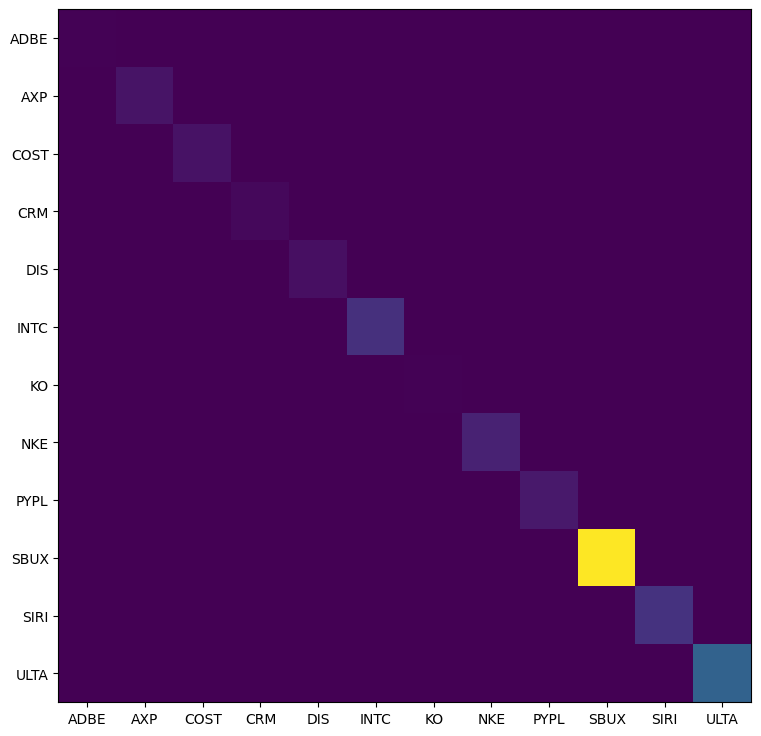

In [57]:
fig,ax= plt.subplots(figsize= (10,9))
im= ax.imshow(b1.omega)

ax.set_xticks(np.arange(len(b1.tickers)))
ax.set_yticks(np.arange(len(b1.tickers)))

ax.set_xticklabels(b1.tickers)
ax.set_yticklabels(b1.tickers)

plt.show()

In [58]:
np.diag(b1.omega)

array([0.00309319, 0.02915589, 0.02708921, 0.0116349 , 0.02318998,
       0.07845936, 0.00343362, 0.053791  , 0.03951105, 0.56556184,
       0.08256985, 0.17864307])

In [59]:
intervals= [
    (0, 0.25),
    (0.1, 0.35),
    (0.02,0.3),
    (0.5,0.7),
    (-0.05, 0.0),
    (-0.05, 0.1),
    (0.1,0.2),
    (-0.25, 0.2),
    (0.08,0.12),
    (0.7, 0.8),
    (0,0.3),
    (0,0.25)
]

In [61]:
variances= []
for lb, ub in intervals:
  sigma= (ub - lb )/2
  variances.append(sigma ** 2)

  print(variances)
  omega= np.diag(variances)

[0.015625]
[0.015625, 0.015624999999999997]
[0.015625, 0.015624999999999997, 0.019599999999999996]
[0.015625, 0.015624999999999997, 0.019599999999999996, 0.009999999999999995]
[0.015625, 0.015624999999999997, 0.019599999999999996, 0.009999999999999995, 0.0006250000000000001]
[0.015625, 0.015624999999999997, 0.019599999999999996, 0.009999999999999995, 0.0006250000000000001, 0.0056250000000000015]
[0.015625, 0.015624999999999997, 0.019599999999999996, 0.009999999999999995, 0.0006250000000000001, 0.0056250000000000015, 0.0025000000000000005]
[0.015625, 0.015624999999999997, 0.019599999999999996, 0.009999999999999995, 0.0006250000000000001, 0.0056250000000000015, 0.0025000000000000005, 0.050625]
[0.015625, 0.015624999999999997, 0.019599999999999996, 0.009999999999999995, 0.0006250000000000001, 0.0056250000000000015, 0.0025000000000000005, 0.050625, 0.00039999999999999986]
[0.015625, 0.015624999999999997, 0.019599999999999996, 0.009999999999999995, 0.0006250000000000001, 0.00562500000000000

In [62]:
## Posterior estimates

b1= BlackLittermanModel(S, pi='market', market_caps= mcaps, risk_aversion= delta, absolute_views= viewdict, omega=omega)

In [68]:
# Posterior estimates of returns

ret_b1= b1.bl_returns()
ret_b1

,0
Ticker,
ADBE,0.109889
AXP,0.101253
COST,0.058321
CRM,0.134818
DIS,-0.029187
INTC,0.047334
KO,0.016911
NKE,0.050776
PYPL,0.071669


In [70]:
rets_df= pd.DataFrame([market_prior, ret_b1, pd.Series(viewdict)], index= ['Market Return', 'Black Litterman Return', 'Return from our View' ])
rets_df

,ADBE,AXP,COST,CRM,DIS,INTC,KO,NKE,PYPL,SBUX,SIRI,ULTA
Market Return,0.244794,0.221453,0.147962,0.244578,0.193724,0.216911,0.121570,0.192537,0.243537,0.193494,0.149524,0.197127
Black Litterman Return,0.109889,0.101253,0.058321,0.134818,-0.029187,0.047334,0.016911,0.050776,0.071669,0.031262,0.035430,0.044421
Return from our View,0.100000,0.400000,0.020000,0.200000,-0.050000,0.010000,-0.030000,0.010000,0.070000,0.010000,-0.010000,0.010000


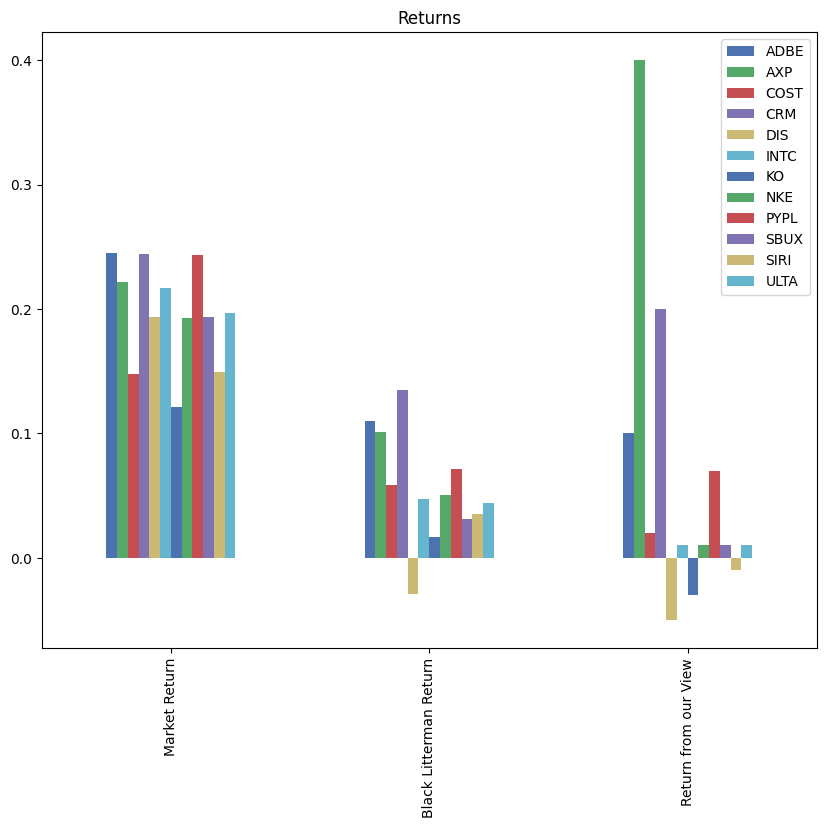

In [71]:
rets_df.plot(kind='bar', title= "Returns", figsize=(10,8))
plt.show()

Returns from Black Litterman Model is often between the market return and return from our views. The weight is determined by the confidence.

<Axes: >

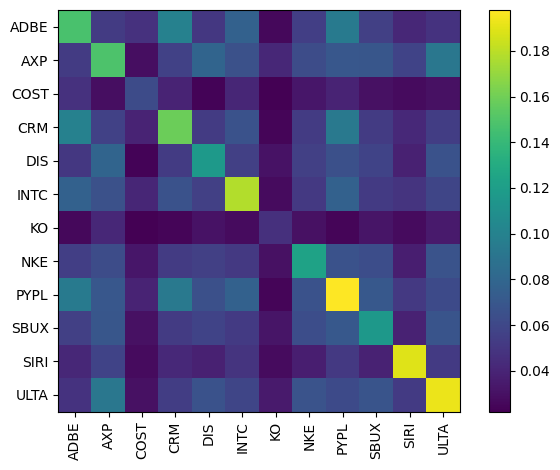

In [103]:
S_b1= b1.bl_cov()
plotting.plot_covariance(S_b1)

In [74]:
## Portfolio Allocation

from pypfopt import EfficientFrontier, objective_functions

In [104]:
ef= EfficientFrontier(ret_b1, S_b1)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe()
weights= ef.clean_weights()
weights

/usr/local/lib/python3.10/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


OrderedDict([('ADBE', 0.21806),
             ('AXP', 0.20484),
             ('COST', 0.09129),
             ('CRM', 0.29686),
             ('DIS', 0.0),
             ('INTC', 0.02499),
             ('KO', 0.0),
             ('NKE', 0.04778),
             ('PYPL', 0.08751),
             ('SBUX', 0.0),
             ('SIRI', 0.00719),
             ('ULTA', 0.02146)])

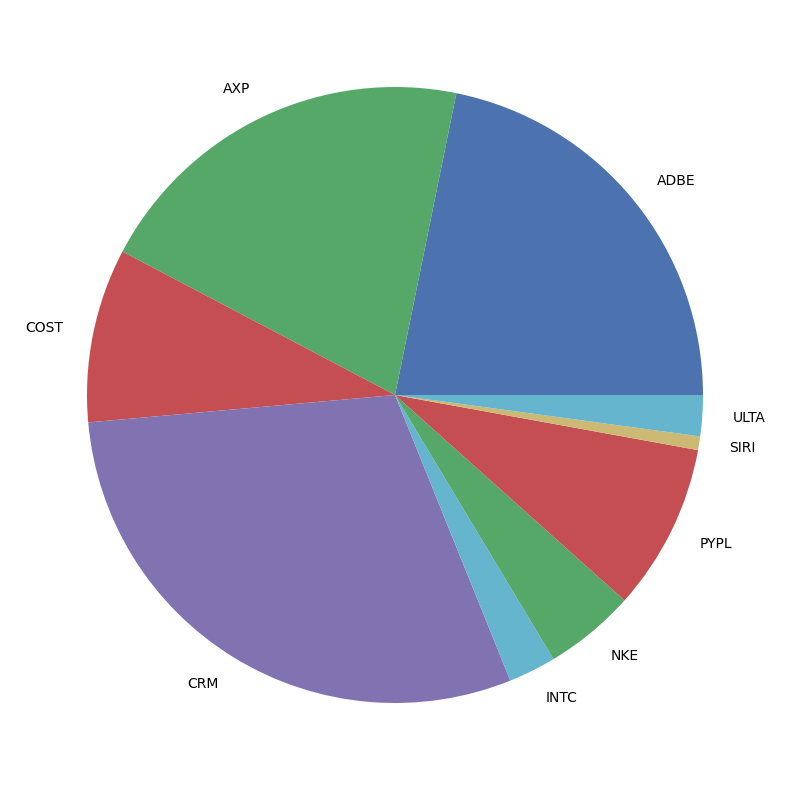

In [105]:
pd.Series(weights).plot.pie(figsize=(10,10))
plt.show()

>>Some of the stock has 0 weights, so we try to add some weights by adding constraint.

## Removing 0 weights

In [132]:
ef= EfficientSemivariance(ret_b1, S_b1)

dis_index= ef.tickers.index('DIS')
ef.add_constraint(lambda w: w[dis_index]<=0.2)

ko_index= ef.tickers.index('KO')
ef.add_constraint(lambda w: w[ko_index]<=0.1)

sbux_index= ef.tickers.index('SBUX')
ef.add_constraint(lambda w: w[sbux_index]>=0.1)

adbe_index= ef.tickers.index('ADBE')
ef.add_constraint(lambda w: w[adbe_index]>=0.1)

ef.min_semivariance()
weights= ef.clean_weights()
weights

OrderedDict([('ADBE', 0.11683),
             ('AXP', 0.08454),
             ('COST', 0.08481),
             ('CRM', 0.08452),
             ('DIS', 0.03597),
             ('INTC', 0.08453),
             ('KO', 0.05366),
             ('NKE', 0.08462),
             ('PYPL', 0.08442),
             ('SBUX', 0.11688),
             ('SIRI', 0.08468),
             ('ULTA', 0.08454)])

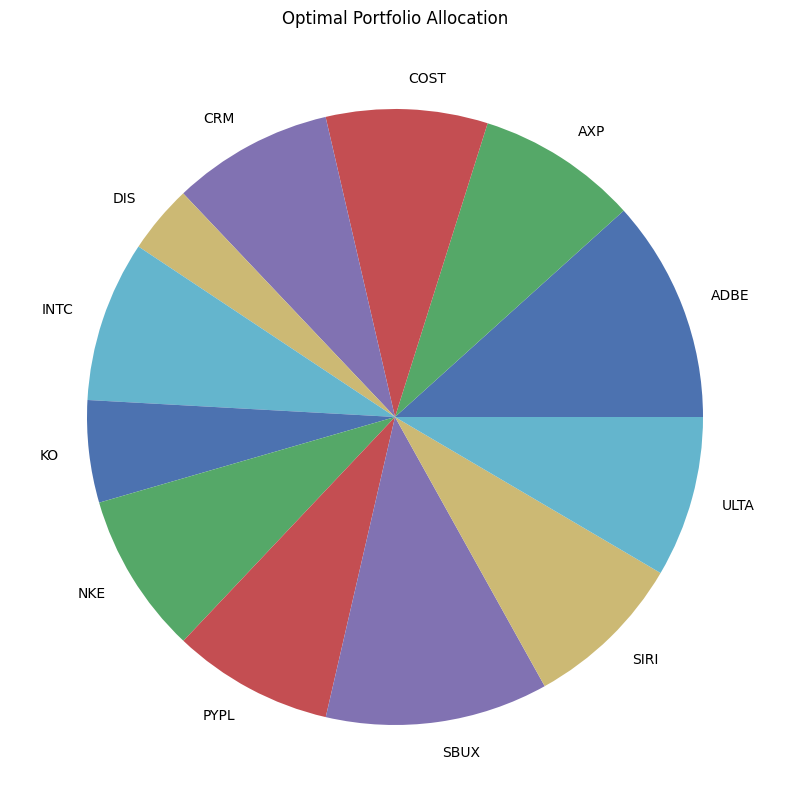

In [134]:
pd.Series(weights).plot.pie(figsize=(10,10), title='Optimal Portfolio Allocation')
plt.show()

>> The optimizer balanced the portfolio by satisying the constraints above and giving more weight to assets with favorable risk return profiles for SBUX and ABDE. It has also limited risk for KO and DIS which may have been associated with higher risks.

## Hierarchical Risk Parity

In [135]:
from pypfopt import expected_returns

rets= expected_returns.returns_from_prices(prices)
rets.tail()

Ticker,ADBE,AXP,COST,CRM,DIS,INTC,KO,NKE,PYPL,SBUX,SIRI,ULTA
Date,,,,,,,,,,,,
2024-08-12,-0.010013,-0.003363,0.010106,-0.004831,-0.003016,-0.017757,-0.007426,0.004036,-0.019469,0.025836,-0.050955,-0.005028
2024-08-13,0.008080,0.008184,0.001447,0.013091,-0.004072,0.057335,0.004254,0.051715,0.026001,0.244970,0.006711,0.034347
2024-08-14,0.008539,0.019959,-0.002440,0.002828,0.008178,-0.026869,0.001753,0.000255,0.015819,-0.020855,-0.030000,-0.007570
2024-08-15,0.026621,0.023548,0.016970,0.029257,0.028853,0.038655,0.001021,0.050688,0.027215,0.010437,0.037801,0.111685
2024-08-16,-0.001263,0.008858,-0.007705,0.000457,0.005744,0.008700,0.007720,0.008849,0.000294,-0.000738,-0.008278,0.031247


In [136]:
from pypfopt import HRPOpt

hrp= HRPOpt(rets)
hrp.optimize()
weights= hrp.clean_weights()
weights

/usr/local/lib/python3.10/dist-packages/pypfopt/hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.54678939 0.54678939 0.54678939 0.54678939 0.54678939 0.54678939]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


OrderedDict([('ADBE', 0.04426),
             ('AXP', 0.04465),
             ('COST', 0.15603),
             ('CRM', 0.04111),
             ('DIS', 0.10657),
             ('INTC', 0.05148),
             ('KO', 0.2249),
             ('NKE', 0.08134),
             ('PYPL', 0.05376),
             ('SBUX', 0.08933),
             ('SIRI', 0.07217),
             ('ULTA', 0.0344)])

KO and COST are the holdings which reflects high risk adjusted return. Smaller weights for assets like ADBE and ULTA suggest that they either have higher risk or lower returns compared to other holdings. Diversification is maintained across the portfolio, reducing the risk associated with any single asset.

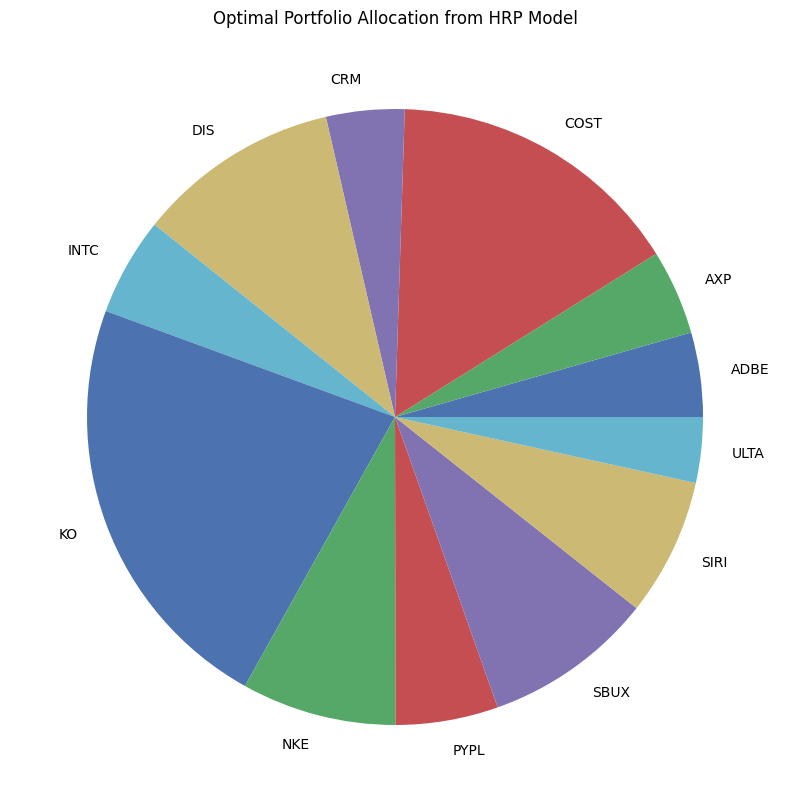

In [137]:
pd.Series(weights).plot.pie(figsize=(10,10), title= 'Optimal Portfolio Allocation from HRP Model')
plt.show()

In [138]:
hrp.portfolio_performance(verbose=True)


Expected annual return: 10.3%
Annual volatility: 21.6%
Sharpe Ratio: 0.39


(0.10330818934500217, 0.2157343485666562, 0.38616098872758853)

The portfolio is anticipated to make 10.3% return. A 21.6% indicates that high level of overall risk. A sharpe ratio of 0.39 indicates that return earned per unit of overall risk is relatively low.

<Axes: >

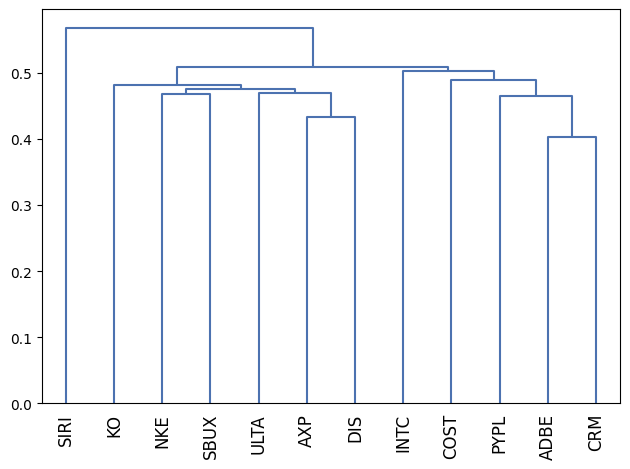

In [140]:
from pypfopt import plotting

plotting.plot_dendrogram(hrp)

From above dendrogram, ADBE and CRM are clustered together, indicating they have similar characteristic. This similarity means that holding both might not provide significant additional diversification benefit. Similarly, SBUX and NKE are in close clusters, suggesting they have might have overlapping risk profiles or market behaviours.